# EDA project documentation

**Table of contents**<a id='toc0_'></a>    
- [Preparations and first glance](#toc1_)    
- [Data Cleaning](#toc2_)    
- [Generating general insight](#toc3_)    
  - [Histograms](#toc3_1_)    
  - [Boxplots](#toc3_2_)    
  - [Barplots](#toc3_3_)    
  - [Correlation](#toc3_4_)    
  - [Geographical mapping](#toc3_5_)    
- [Regarding the hypotheses and insights](#toc4_)    
  - [1) Does the location of a house affect the price?](#toc4_1_)    
  - [2) Are older houses of less quality?](#toc4_2_)    
  - [3) Do larger houses have more rooms?](#toc4_3_)    
- [Customer's wishes](#toc5_)    
  - [1) Located near the waterfront](#toc5_1_)    
  - [2) Not too costly](#toc5_2_)    
  - [3) Nice house with enough rooms for kids and a spacious lot / garden](#toc5_3_)    
  - [4) Isolated from other houses but in a central neighbourhood without kids](#toc5_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Preparations and first glance](#toc0_)
To start with the EDA, as a first step the necessary libraries are imported. Afterwards the files needed are loaded.


In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import psycopg2
import missingno as msno
from uszipcode import SearchEngine, ComprehensiveZipcode

/Users/sarahwiesner/neuefische/eda_project/.venv/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# import the necessary libraries you need for your visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# load dotenv from os
import os
from dotenv import load_dotenv

load_dotenv("./.env")

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)
# create cursor
cur = conn.cursor()

# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales JOIN eda.king_county_house_details ON eda.king_county_house_sales.house_id = eda.king_county_house_details.id"
df = pd.read_sql(query_string, conn)

# close the connection
conn.close()



In [4]:
#export the data to a csv-file
df.to_csv('data/eda.csv', na_rep=['<NA>'], index=False)

Next, one might want to get an overview what the data looks like, how large the DataFrame is and what it contains.

In [5]:
# DataFrame size
df.shape

(21597, 23)

In [6]:
# information on column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id             21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [7]:
df.head(10)

date      price    house_id  id          id  bedrooms  bathrooms  \
0  2014-10-13   221900.0  7129300520   1  7129300520       3.0       1.00   
1  2014-12-09   538000.0  6414100192   2  6414100192       3.0       2.25   
2  2015-02-25   180000.0  5631500400   3  5631500400       2.0       1.00   
3  2014-12-09   604000.0  2487200875   4  2487200875       4.0       3.00   
4  2015-02-18   510000.0  1954400510   5  1954400510       3.0       2.00   
5  2014-05-12  1230000.0  7237550310   6  7237550310       4.0       4.50   
6  2014-06-27   257500.0  1321400060   7  1321400060       3.0       2.25   
7  2015-01-15   291850.0  2008000270   8  2008000270       3.0       1.50   
8  2015-04-15   229500.0  2414600126   9  2414600126       3.0       1.00   
9  2015-03-12   323000.0  3793500160  10  3793500160       3.0       2.50   

   sqft_living  sqft_lot  floors  ...  grade  sqft_above  sqft_basement  \
0       1180.0    5650.0     1.0  ...      7      1180.0            0.0   
1       2570.0    7242.0     2.0  ...      7      2170.0          400.0   
2        770.0   10000.0     1.0  ...      6       770.0            0.0   
3       1960.0    5000.0     1.0  ...      7      1050.0          910.0   
4       1680.0    8080.0     1.0  ...      8      1680.0            0.0   
5       5420.0  101930.0     1.0  ...     11      3890.0         1530.0   
6       1715.0    6819.0     2.0  ...      7      1715.0            NaN   
7       1060.0    9711.0     1.0  ...      7      1060.0            0.0   
8       1780.0    7470.0     1.0  ...      7      1050.0          730.0   
9       1890.0    6560.0     2.0  ...      7      1890.0            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257         1340.0   
1      1951       19910.0    98125  47.7210 -122.319         1690.0   
2      1933           NaN    98028  47.7379 -122.233         2720.0   
3      1965           0.0    98136  47.5208 -122.393         1360.0   
4      1987           0.0    98074  47.6168 -122.045         1800.0   
5      2001           0.0    98053  47.6561 -122.005         4760.0   
6      1995           0.0    98003  47.3097 -122.327         2238.0   
7      1963           0.0    98198  47.4095 -122.315         1650.0   
8      1960           0.0    98146  47.5123 -122.337         1780.0   
9      2003           0.0    98038  47.3684 -122.031         2390.0   

   sqft_lot15  
0      5650.0  
1      7639.0  
2      8062.0  
3      5000.0  
4      7503.0  
5    101930.0  
6      6819.0  
7      9711.0  
8      8113.0  
9      7570.0  

[10 rows x 23 columns]

Using the [US Zipcode Library](https://uszipcode.readthedocs.io/index.html) is helpful as it provides information on the geographic and demographic data according to each zipcode in the us, containing more than 1300 datapoints of a zipcode. 

In [8]:
# get details on the area and the neighbourhood from the uszipcode library
# takes quite some time to download, please be patient (450 MB)

zip_x = df.zipcode # list of all zipcodes

search = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive) # download data

In [9]:
# define functions to get values from uszipcode library
def zco(zip_x):
    city = search.by_zipcode(zip_x).major_city  # get the city names for the zip codes
    return city if city else 'None'
    
    
def zco2(zip_x):
    kids = search.by_zipcode(zip_x).households_with_kids  # get the number of households for the zip codes
    return kids if kids else NaN

In [10]:
# apply function and add column city to DataFrame
df['city'] = df['zipcode'].apply(zco)

In [11]:
# apply function, returns series
df_kids = df['zipcode'].apply(zco2)

# generating helper DataFrame
help_df = pd.DataFrame(df_kids)
help_df.rename(columns={'zipcode': 'kids'}, inplace=True)



In [12]:
# define function to read values out of dictionary which is given in the columns of the library
kidsnum = []
kidsnum2 = []
def kids_function(help_df):
    for i in range(0,len(help_df)):
        kidsnum.append(help_df[i][0]['values'][0]['y']) # households without kids
        kidsnum2.append(help_df[i][0]['values'][1]['y']) # households with kids
    return kidsnum, kidsnum2  
        

In [13]:
# apply function
df_help = help_df.apply(kids_function)

In [14]:
# add to dataframe
df['no_kids'] = kidsnum
df['kids'] = kidsnum2

## <a id='toc2_'></a>[Data Cleaning](#toc0_)

To get a consistent dataset, several steps need to be conducted for cleaning.

In [15]:
# Are there any duplicates in the data
df.duplicated().value_counts()


False    21597
dtype: int64

In [16]:
# drop id column (three columns with this name after joining)

df.drop(["id", "id"], axis=1, inplace=True)

In [17]:
# convert date object into datetime

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [18]:
# have a look at desciptive statistics - helps to identify odd values
df_stats = df.describe()
df_stats

price      house_id      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   5.402966e+05  4.580474e+09      3.373200      2.115826   2080.321850   
std    3.673681e+05  2.876736e+09      0.926299      0.768984    918.106125   
min    7.800000e+04  1.000102e+06      1.000000      0.500000    370.000000   
25%    3.220000e+05  2.123049e+09      3.000000      1.750000   1430.000000   
50%    4.500000e+05  3.904930e+09      3.000000      2.250000   1910.000000   
75%    6.450000e+05  7.308900e+09      4.000000      2.500000   2550.000000   
max    7.700000e+06  9.900000e+09     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19206.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007602      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086858      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...  sqft_basement      yr_built  yr_renovated       zipcode  \
count  ...   21145.000000  21597.000000  17749.000000  21597.000000   
mean   ...     291.857224   1970.999676    836.650516  98077.951845   
std    ...     442.490863     29.375234   4000.110554     53.513072   
min    ...       0.000000   1900.000000      0.000000  98001.000000   
25%    ...       0.000000   1951.000000      0.000000  98033.000000   
50%    ...       0.000000   1975.000000      0.000000  98065.000000   
75%    ...     560.000000   1997.000000      0.000000  98118.000000   
max    ...    4820.000000   2015.000000  20150.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15       no_kids  \
count  21597.000000  21597.000000   21597.000000   21597.000000  21597.000000   
mean      47.560093   -122.213983    1986.620318   12758.283512   8553.567718   
std        0.138552      0.140724     685.230472   27274.441950   3828.315641   
min       47.155900   -122.519000     399.000000     651.000000    638.000000   
25%       47.471100   -122.328000    1490.000000    5100.000000   5984.000000   
50%       47.571800   -122.231000    1840.000000    7620.000000   8101.000000   
75%       47.678000   -122.125000    2360.000000   10083.000000  10315.000000   
max       47.777600   -121.315000    6210.000000  871200.000000  18811.000000   

               kids  
count  21597.000000  
mean    3783.539334  
std     1498.650036  
min      424.000000  
25%     2602.000000  
50%     3892.000000  
75%     4870.000000  
max     7942.000000  

[8 rows x 22 columns]

In [19]:
# convert several columns to dtype "Int64"
df['price'] = df['price'].astype('Int64')
df['sqft_living'] = df['sqft_living'].astype('Int64')
df['sqft_lot'] = df['sqft_lot'].astype('Int64')
df['waterfront'] = df['waterfront'].astype('Int64')
df['view'] = df['view'].astype('Int64')
df['sqft_above'] = df['sqft_above'].astype('Int64')
df['sqft_basement'] = df['sqft_basement'].astype('Int64')
df['sqft_living15'] = df['sqft_living15'].astype('Int64')
df['sqft_lot15'] = df['sqft_lot15'].astype('Int64')

In [20]:
# remove 0 from yr_renovated
df['yr_renovated'] = df.yr_renovated.apply(lambda x : x/10)


In [21]:
# fill <NA> values in yr_renovated with nan 
df['yr_renovated'].replace(0, np.nan, inplace=True)

In [22]:
# convert yr_renovated to dtype "Int64" and remove one 0
df['yr_renovated'] = df['yr_renovated'].astype('Int64')


To know the frequency of missing information is valuable. Therefore, missigno is used.

In [23]:
# display number of missing values per column
df.isna().sum()

date                 0
price                0
house_id             0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2391
view                63
condition            0
grade                0
sqft_above           0
sqft_basement      452
yr_built             0
yr_renovated     20853
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
city                 0
no_kids              0
kids                 0
dtype: int64

<AxesSubplot:>

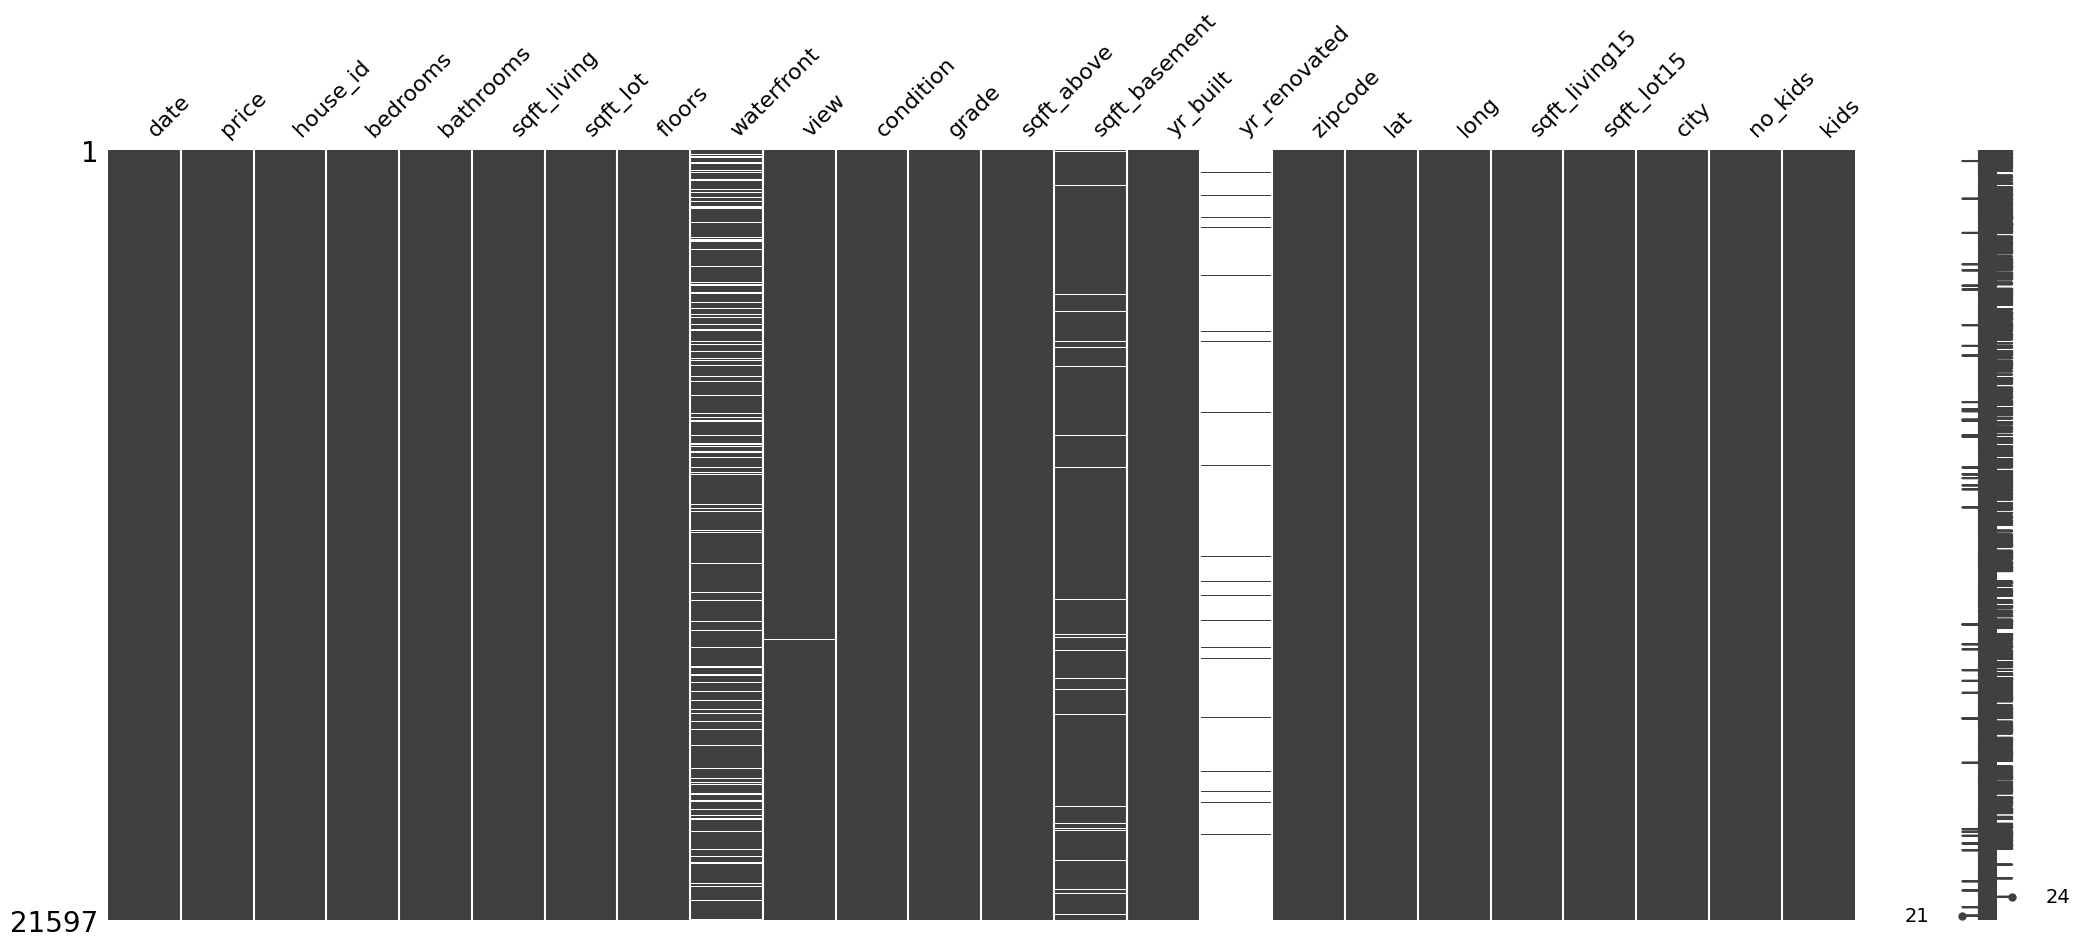

In [24]:
# visualisation of NaN with missigno
 
msno.matrix(df)

This plot shows, that for the yr_renovated data the most values are missing. Also, the waterfront data show a lot of gaps. For sqft_basement some cells are empty and one information on the number of views is not given.


To deal with NaNs and < NA > values, the corresponding columns are cleaned.
For visualization later on, new dataframes are created that do not contain the houses for which the respective column contains NaNs. The same is done for zeros in case of the "view" table, assuming that 0 means that there is no information on this parameter.

In [25]:
# creating new dataframes and filter for values that are not NaN or 0

df_view_clean = df[df['view'] != 0] 
df_view_clean = df_view_clean[df_view_clean['view'].notna()]

In [26]:
df_waterfront_clean = df[df['waterfront'].notna()]

In [27]:
# within the existing dataframe

# convert waterfront to boolean
df.waterfront.fillna(0, inplace=True) # assuming NA means no waterfront
df['waterfront'] = df['waterfront'].astype('bool')

# fill NA with 0 for view value
df.view.fillna(0, inplace=True) 

In [28]:
df.columns

Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'city', 'no_kids',
       'kids'],
      dtype='object')

## <a id='toc3_'></a>[Generating general insight](#toc0_)

The following three questions and corresponding hypotheses are to be answered with the data analysis in this notebook:

1.) Does the location of a house affect the price?
    Hypothesis 1: Houses at the waterfront are more expensive.
    Hypothesis 2: Objects within the suburbs are less expensive.

2.) Are older houses of less quality?
    Hypothesis: The grade of the housing unit is depending on the age and the year of the last renovation.

3.) Do larger houses have more rooms?
    Hypothesis: The number of bedrooms and bathrooms increases with the living area.

Before the questions and hypotheses are approched, we have a look at the data in general. First, some simple queries, calculations and visualization is helpful to get an idea about the distribution of the data, extreme values and relationships between parameters.

In [29]:
# when were the houses sold, and where are they located

print("Earliest selling: ", df.date.min().strftime("%m/%d/%Y"))
print("Last selling: ", df.date.max().strftime("%m/%d/%Y"))

print("Range of zip codes: ", df.zipcode.min(), ' - ', df.zipcode.max())



Earliest selling:  05/02/2014
Last selling:  05/27/2015
Range of zip codes:  98001  -  98199


### <a id='toc3_1_'></a>[Histograms](#toc0_)

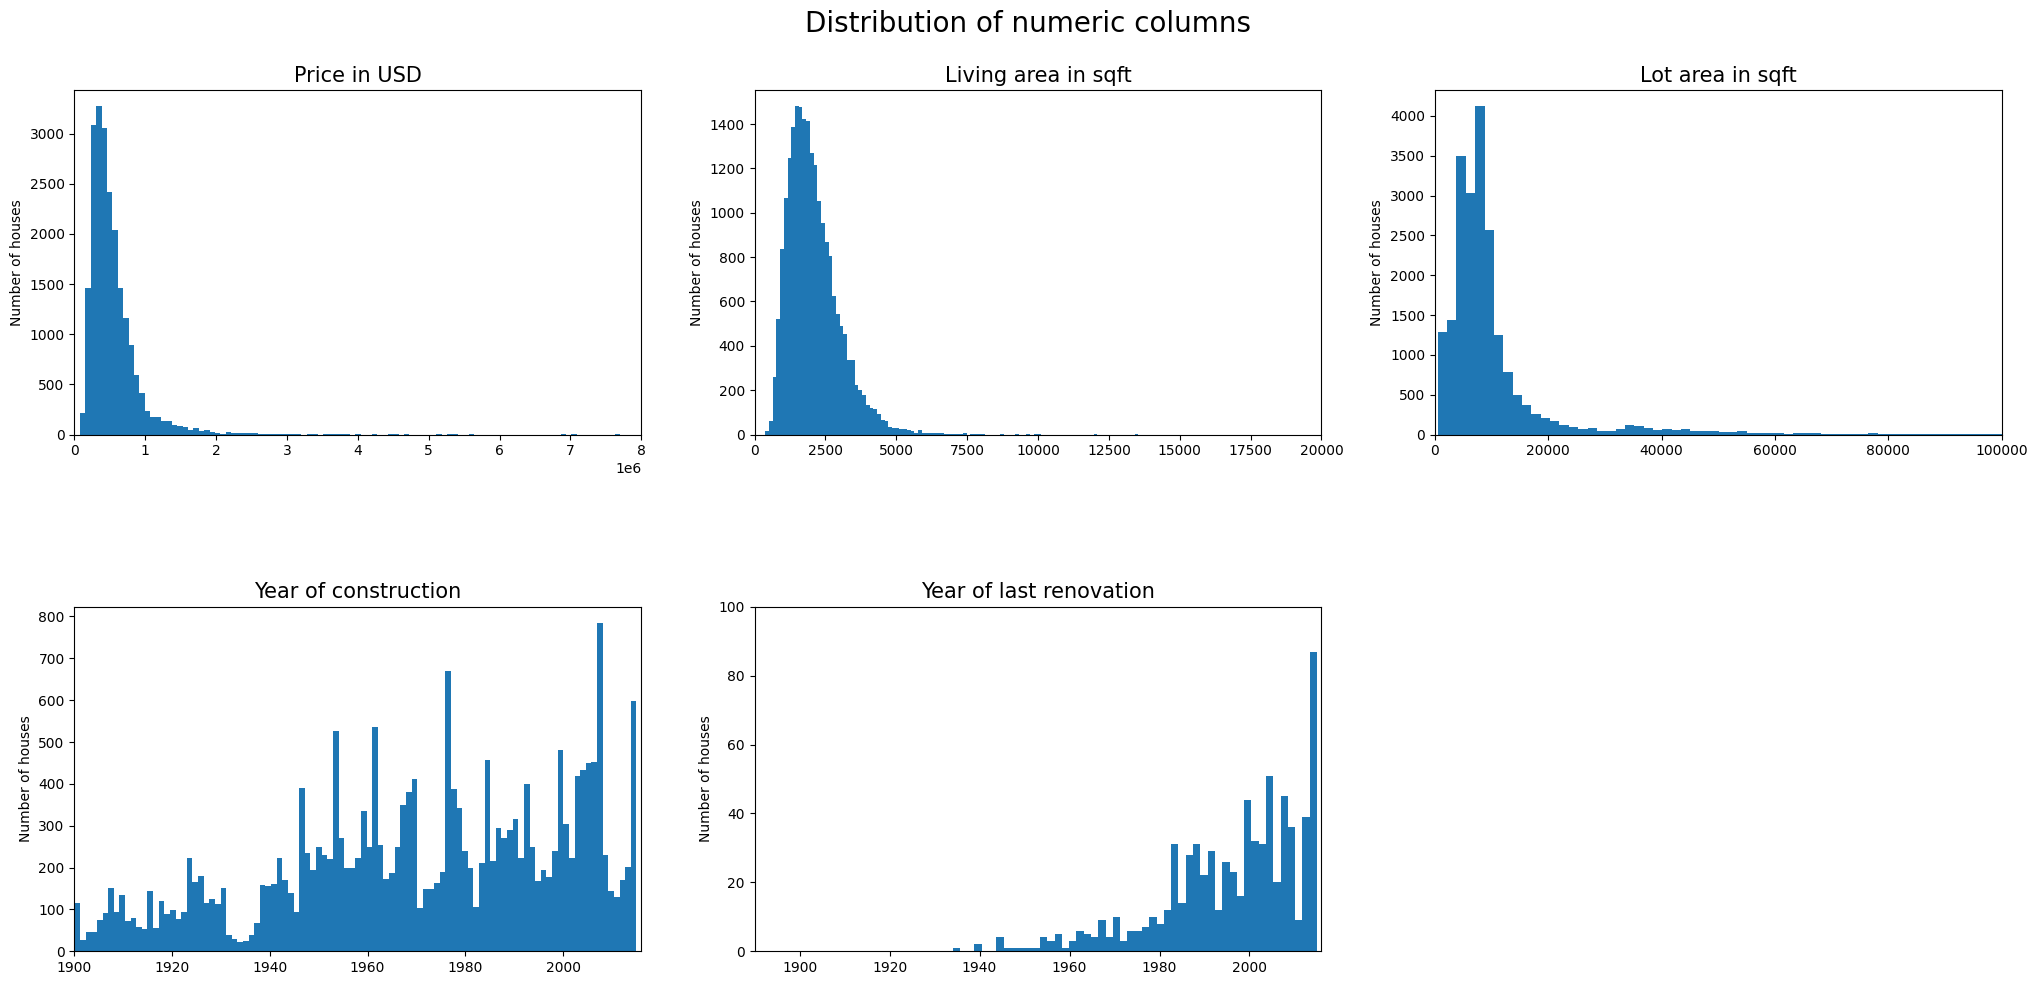

In [30]:
# distribution of numeric parameters

df_renovated = df[df['yr_renovated'] > 0] # filter to avoid error in generating histogram 

fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df['price'], bins=100)  # creates histogram
ax[0][0].set_ylabel("Number of houses", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,8000000) # limits the x-axis 
ax[0][0].set_title("Price in USD", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x=df['sqft_living'], bins=100)
ax[0][1].set_ylabel("Number of houses", fontsize = 10)
ax[0][1].set_xlim(0,20000) 
ax[0][1].set_title("Living area in sqft", fontsize = 15);  

ax[0][2].hist(x=df['sqft_lot'], bins=1000)
ax[0][2].set_ylabel("Number of houses", fontsize = 10)
ax[0][2].set_xlim(0,100000) 
ax[0][2].set_title("Lot area in sqft", fontsize = 15);  

ax[1][0].hist(x=df['yr_built'], bins=100)
ax[1][0].set_ylabel("Number of houses", fontsize = 10)
ax[1][0].set_xlim(1900,2016) 
ax[1][0].set_title("Year of construction", fontsize = 15);  

ax[1][1].hist(x=df_renovated['yr_renovated'], bins=50)
ax[1][1].set_ylabel("Number of houses", fontsize = 10)
ax[1][1].set_xlim(1890,2016) 
ax[1][1].set_ylim(0,100)  #0 are not displayed, thus y axis needs to be modified to fit values
ax[1][1].set_title("Year of last renovation", fontsize = 15);  


fig.delaxes(ax[1][2])

The distributions of in the histograms above show the value of a numeric parameter (in bins) and the number of houses sold corresponding to this value. 

The distributions for the price, the living area and the lot area are right skewed. This means, that the median is closer to the lower end of the range, while high values are less common and spread.

The houses in this database are of different ages: A part of it was built from 1900 to 1930. Apparently after WWII the construction of houses was resumed. In the 1950, the late 1970 as well as the 2010s peaks in the number of houses built are striking. Regarding the latest renovation of the building, the number increases up to present.

### <a id='toc3_2_'></a>[Boxplots](#toc0_)

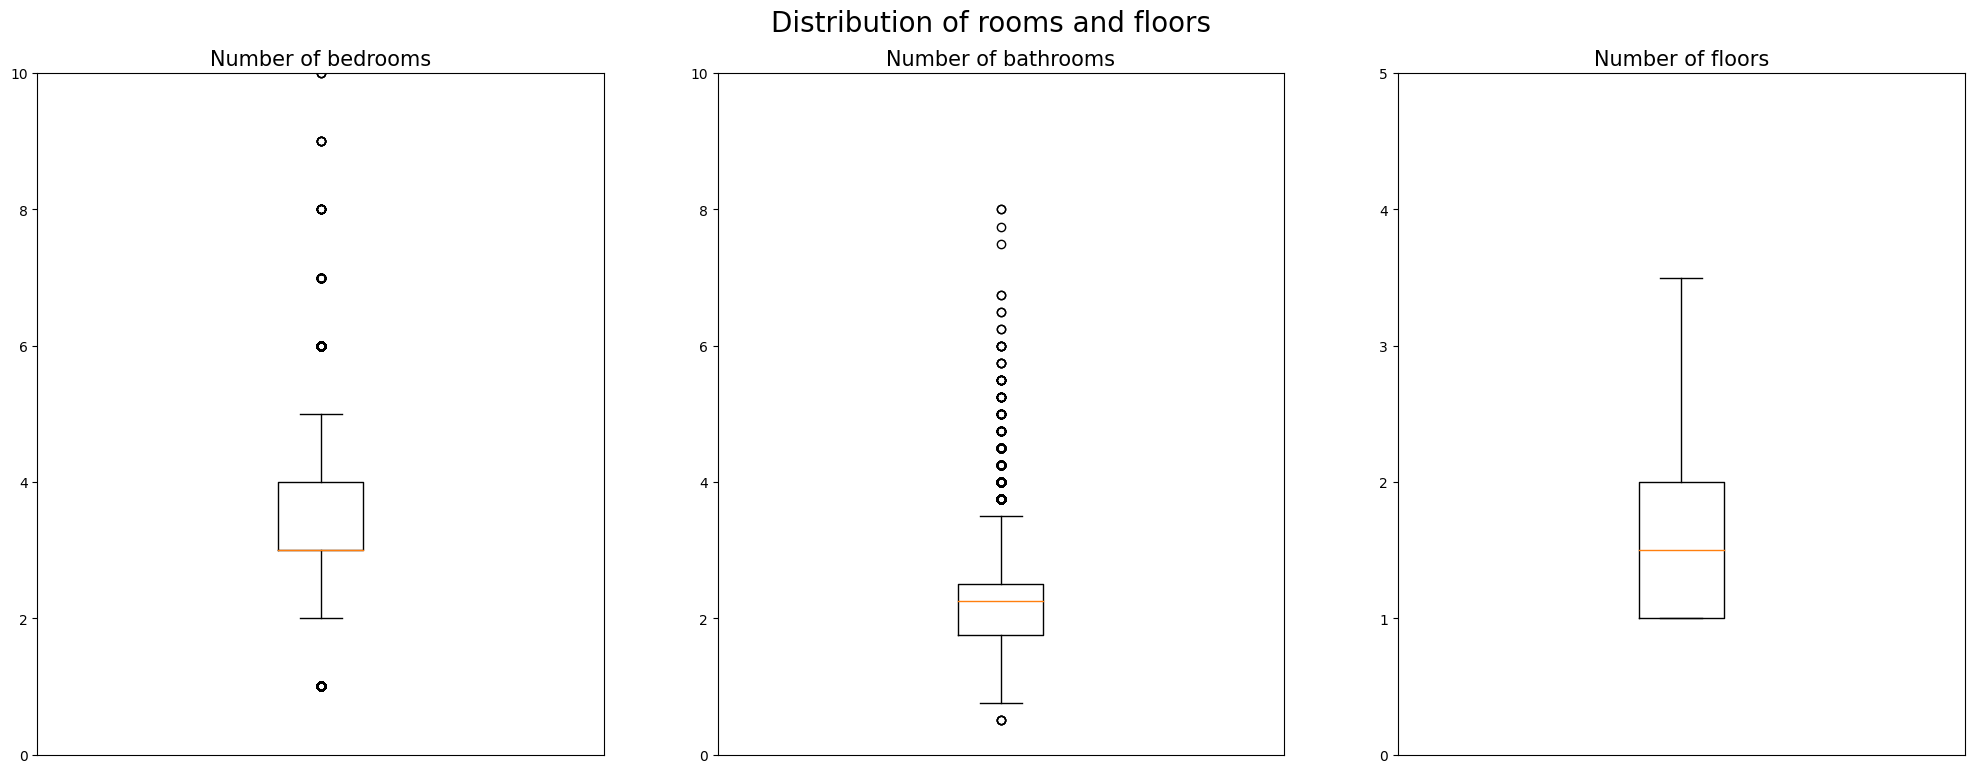

In [31]:
# distribution of numeric parameters 2

fig, ax = plt.subplots(1,3, figsize=(20,8)) # create subplots on 1 row and 3 columns
plt.suptitle('Distribution of rooms and floors', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0].boxplot(x = df['bedrooms']) # creates boxplot 
ax[0].set_xticks([])
ax[0].set_ylim(0,10) # limits the y-axis values from 0 to 10 
ax[0].set_title("Number of bedrooms", fontsize = 15); # sets title for subplot

ax[1].boxplot(x = df['bathrooms']) 
ax[1].set_xticks([])
ax[1].set_ylim(0,10) 
ax[1].set_title("Number of bathrooms", fontsize = 15); 

ax[2].boxplot(x = df['floors']) 
ax[2].set_xticks([])
ax[2].set_ylim(0,5) 
ax[2].set_title("Number of floors", fontsize = 15); 


The range of the number of rooms is pretty narrow: The mid 50% of houses have 3-4 bedrooms (median 3) and 1.75 to 2.5 bathrooms (median 2.25). There are, however, some impressive outliers. The number of floors is 1 to 2.

### <a id='toc3_3_'></a>[Barplots](#toc0_)

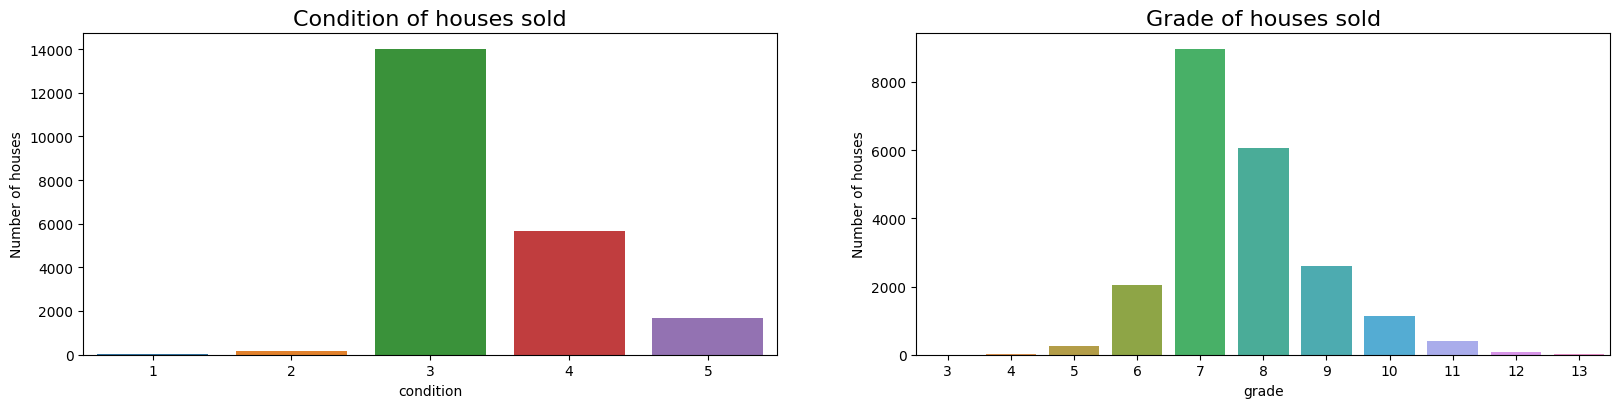

In [32]:
# frequency of categorical parameters

fig, ax = plt.subplots(1,2, figsize=(16,4)) # create subplots on 1 row and 2 columns
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

p1 = sns.countplot(x = df['condition'], ax=ax[0])
p1.set(xlabel="condition") 
p1.set_ylabel("Number of houses", fontsize = 10); 
p1.set_title('Condition of houses sold', fontsize=16); 

p2 = sns.countplot(x = df['grade'], ax=ax[1])
p2.set(xlabel="grade") 
p2.set_ylabel("Number of houses", fontsize = 10); 
p2.set_title('Grade of houses sold', fontsize=16); 


The houses sold are mainly of condition class 3, and subordinately 4 and 5. Very little houses are of a very good condition (1 or 2).

The grades of the housing units sold are based on King County grading system (1-3 Falls short of minimum building standards, 13 Generally custom designed and built. Mansion level). The most common values are 7 and 8 (7 Average grade of construction and design. Commonly seen in plats and older sub-divisions, 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work). The distribution is slightly right skewed: the are more values above the mode value, yet spread over a larger range of grades. Grade 1 and 2 are not available.


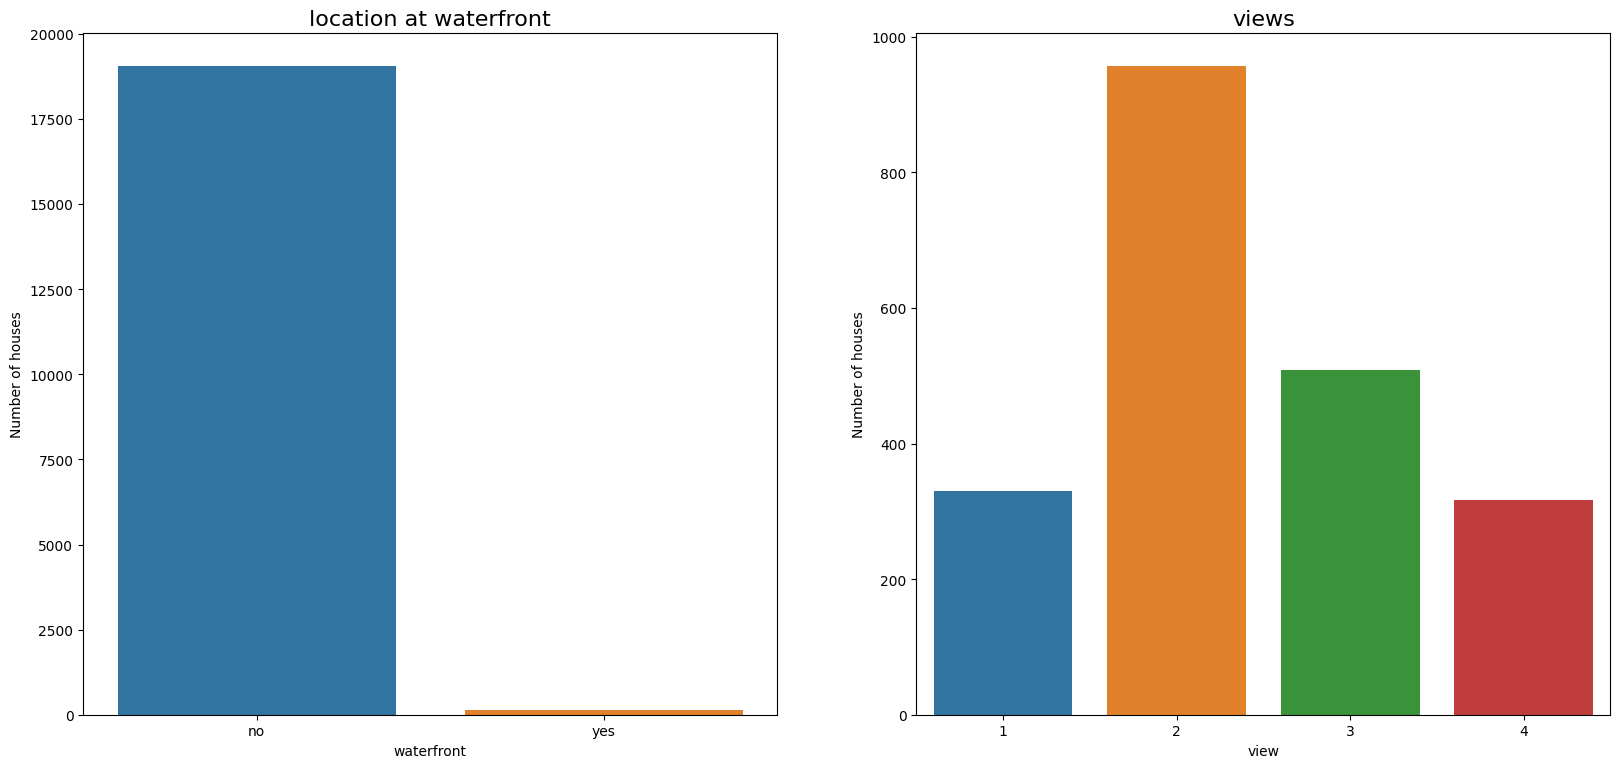

In [33]:
# Visualize features of location

fig, ax = plt.subplots(1,2, figsize=(16,8)) # create subplots on 1 row and 2 columns
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

p1 = sns.countplot(x = df_waterfront_clean.waterfront, ax=ax[0])  # using the dataframe that contains no NaN
p1.set(xticklabels=['no','yes'])
p1.set_ylabel("Number of houses", fontsize = 10); 
p1.set_title('location at waterfront', fontsize=16); 

p2 = sns.countplot(x = df_view_clean.view, ax=ax[1]) # using the dataframe that contains no NaN and no zeros
p2.set(xlabel="view") 
p2.set(xticklabels=['1','2','3','4'])
p2.set_ylabel("Number of houses", fontsize = 10); 
p2.set_title('views', fontsize=16);


In [34]:
# calculate share of houses at waterfront
not_wf = df_waterfront_clean.groupby('waterfront').count()["house_id"][0] # not at waterfront or no information
wf = df_waterfront_clean.groupby('waterfront').count()["house_id"][1] # known to be at waterfront
total_wf = df_waterfront_clean.shape[0] # total without nans

share_wf = wf/total_wf
print(round(share_wf, 2))

0.01


Only a very small share of the houses sold are KNOWN to be located at the waterfront (0.01 %). It is realistic to assume, that the data on this parameter is not complete and several zeros are still located near the water.

Data on the number of views the house had before it was sold might show, that mostly after two potential buyers saw the property, they decided to buy. More than 4 views did not occur - at least not documented.

### <a id='toc3_4_'></a>[Correlation](#toc0_)

The correlation matrix of the different numerical values in the DataFrame might give an idea, which parameters are related to each other. It can be visualized by a heat map, which makes the values easier to capture.

In [35]:
# correlation matrix between variables

# exclude 0 from yr_renovated
df_renovated = df[df['yr_renovated'] > 0]

corr_columns=["price", "sqft_living", "sqft_lot", "bedrooms", "bathrooms", "view", "condition", "grade", "yr_built", "yr_renovated"]
corr_mtrx=df_renovated[corr_columns].corr()

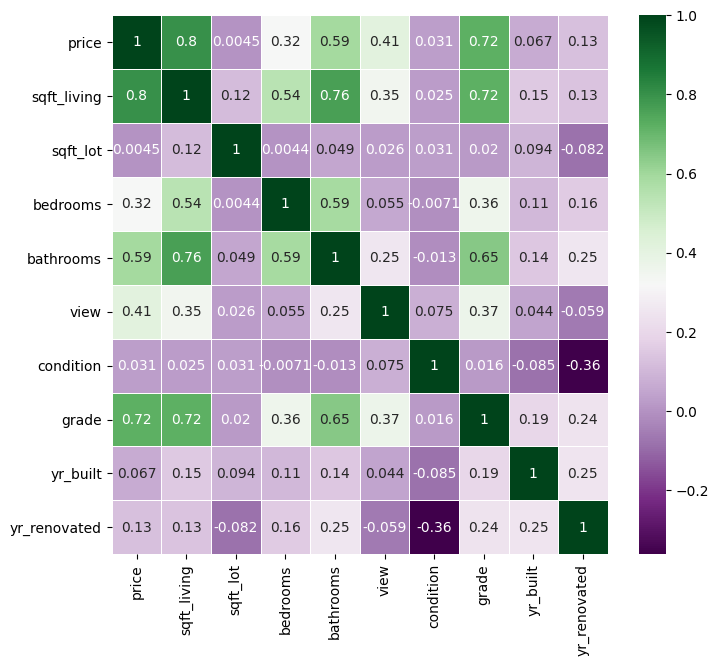

In [36]:
# draw a heatmap 
plt.figure(figsize = (8,7))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='PRGn')

So one can identify positive relationships between:

- Price and sqft_living
- Price and grade
- Sqft_living bathrooms
- Sqft_living and grade

There are no notable relationships between the other variables.

In [37]:
# Int64 type cannot be used for pivot tables, so the respective variables need to be converted to int64
df[['price', 'view', 'grade']] = df[['price', 'view', 'grade']].astype('int64')  

In [38]:
# pivot table with decimals rounded to 0
df_pivot = np.round(pd.pivot_table(df, values='price', index='grade', columns='view', aggfunc=np.mean), 0)

<AxesSubplot:xlabel='grade', ylabel='price in USD'>

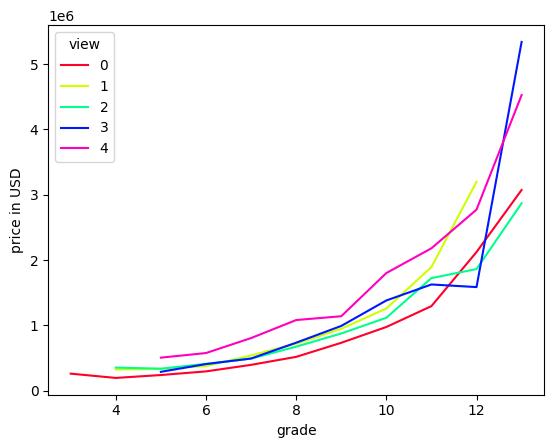

In [39]:
# visualization of the pivot table
df_pivot.plot(xlabel = 'grade', ylabel = 'price in USD', colormap = 'gist_rainbow')

The pivot table shows the relation between grade and price of the houses, while the view categories 1 and 4 appear to on the upper range for every grade-price-constellation.
Objects rated with a higher grade are viewed more often or sold immediately (and are more expensive).

### <a id='toc3_5_'></a>[Geographical mapping](#toc0_)

A next step could be to get an overview over the locations of the houses and their prices by plotting a geographical map.

In [40]:
#Filter for houses of less than 2 M USD, to make differences more visible

df_price = df[df["price"] < 2000000]

# create a map of the area with the location of the houses
fig = px.scatter_mapbox(df_price, 
                        lat="lat", lon="long", # location
                        color="price", # column for ranking
                        hover_name="house_id", 
                        hover_data=["bedrooms", "sqft_living"], 
                        size_max=15, 
                        zoom=8, 
                        width=900, height=500, #map size
                        title =  'Seattle area houses',
                        color_continuous_scale=px.colors.sequential.dense)
#style of map

fig.update_layout(mapbox_style="open-street-map")

In which zip code area of the city are the houses that were sold located? Coloring the objects by zipcodes gives an overview over the neighbourhoods. Afterward, the information on demographic parameters can be used.

In [41]:
# create a map of the area with the location of the houses
fig = px.scatter_mapbox(df, 
                        lat="lat", lon="long", # location
                        color="zipcode", # column for ranking
                        hover_name="house_id", 
                        hover_data=["price"], 
                        size_max=15, 
                        zoom=8, 
                        width=900, height=500, #map size
                        title =  'Seattle area houses',
                        color_continuous_scale=px.colors.sequential.Turbo,
                        labels = {'zipcode': 'zip'})
#style of map
fig.update_layout(mapbox_style="open-street-map")

## <a id='toc4_'></a>[Regarding the hypotheses and insights](#toc0_)

### <a id='toc4_1_'></a>[1) Does the location of a house affect the price?](#toc0_)
Hypothesis 1: Houses at the waterfront are more expensive.

To give evidence for this hypothesis, not the entire DataFrame is used. Only houses within the range of 25th to 75th percentile of prices are used. Houses that are more or less expensive probably have other features that have major impact on their price.


In [42]:
# average price for houses with known location at the waterfront vs. without

# filter houses within price range 25-75th percentile
# using the dataframe that contains no NaN
df_midprice = df_waterfront_clean[df_waterfront_clean['price'] >= df_stats.price['25%']]
df_midprice = df_midprice[df_midprice['price'] <= df_stats.price['75%']]


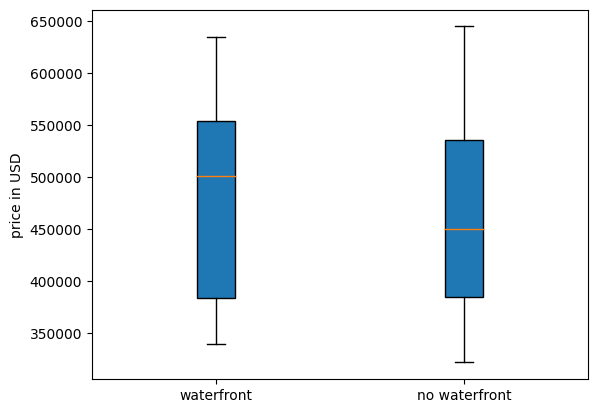

In [43]:
# boxplot average price for waterfront vs. non

fig, ax = plt.subplots()
columns = [df_midprice[df_midprice['waterfront'] == True].price, df_midprice[df_midprice['waterfront'] == False].price]
ax.boxplot(columns, patch_artist=True)
plt.xticks([1, 2], ["waterfront", "no waterfront"])
plt.ylabel("price in USD")
plt.show()

There is a visible differences in prices between houses with known location at the waterfront and those with known location not at the waterfront. The ones close to the water are more expensive.

Hypothesis 2: Objects within the suburbs are less expensive.


In [44]:
#  average price for Seattle and suburbs

df_suburbs = df[df['city'] != "Seattle"]
df_center = df[df['city'] == "Seattle"]

# filter houses within price range 25-75th percentile
df_suburbs_midprice = df_suburbs[df_suburbs['price'] >= df_stats.price['25%']]
df_suburbs_midprice = df_suburbs_midprice[df_suburbs_midprice['price'] <= df_stats.price['75%']]

df_center_midprice = df_center[df_center['price'] >= df_stats.price['25%']]
df_center_midprice = df_center_midprice[df_center_midprice['price'] <= df_stats.price['75%']]




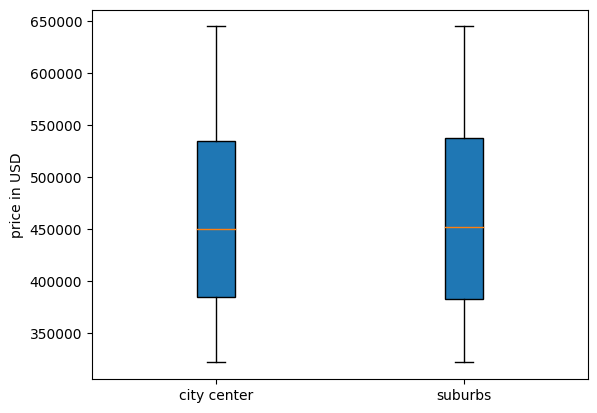

In [45]:
# boxplot average price for suburbs vs. center

fig, ax = plt.subplots()
columns = [df_center_midprice.price, df_suburbs_midprice.price]
ax.boxplot(columns, patch_artist=True)
plt.xticks([1, 2], ["city center", "suburbs"])
plt.ylabel("price in USD")

plt.show()

There is no obvious differences in house prices between Seattle zip code areas and prices of houses in the suburbs.

This is also visible from the geographical map above.

### <a id='toc4_2_'></a>[2) Are older houses of less quality?](#toc0_)
Hypothesis: The grade of the housing unit is depending on the age and the year of the last renovation.

In [46]:
# correlation matrix using  DataFrame with yr_renovated not 0

corr_columns2=["grade", "yr_built", "yr_renovated"]
corr_mtrx2=df_renovated[corr_columns2].corr()

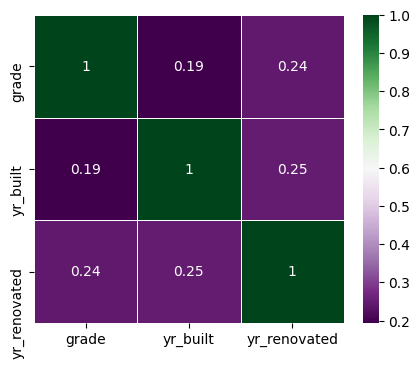

In [47]:
# draw a heatmap 
plt.figure(figsize = (5,4))
ax = sns.heatmap(corr_mtrx2, linewidths=.5, annot=True, cmap='PRGn')

According to the data one cannot assume that a house that was built in the recent years or has been renovated lately is of a higher grade. Here, the grade is defined as "overall grade given to the housing unit, based on King County grading system".

### <a id='toc4_3_'></a>[3) Do larger houses have more rooms?](#toc0_)
Hypothesis: The number of bedrooms and bathrooms increases with the living area. 

For this analysis only the houses up to 75 th percentile are regarded, as naturally very large houses have many rooms. This might have an distorting effect.

In [48]:
# filter houses within living area range 0-75th percentile
df_midla = df[df['sqft_living'] <= df_stats.sqft_living['75%']]
df_midla = df_midla[df_midla['sqft_lot'] <= df_stats.sqft_lot['75%']]


df_midla['sqft_living'] = df_midla['sqft_living'].astype(int) # define datatype as int, because Int64 made some trouble
df_midla['sqft_lot'] = df_midla['sqft_lot'].astype(int) # define datatype as int, because Int64 made some trouble

In [49]:
# scatterplot depicting relation between sqft_living, and number of bedrooms and bathrooms

fig = px.scatter(df_midla, 
                x='bedrooms', 
                y='bathrooms', 
                color = 'sqft_living',
                range_x=(0,10),
                color_continuous_scale=px.colors.sequential.dense
)
fig.update_traces(marker_size=12)

fig.show()


In [50]:
# including lot area on y-axis
df_bed = df[df['bedrooms'] <= 8]

fig = px.scatter(df_bed, x="sqft_living", y="sqft_lot", color="bedrooms", range_x=(0,8000), range_y=(0,300000),
                color_continuous_scale=px.colors.sequential.dense)
fig.show()

These plots visualize that with increasing area of living space of the houses the number of bedrooms increases. For bathrooms this relation is not that obvious.

## <a id='toc5_'></a>[Customer's wishes](#toc0_)

The customer Larry Sanders has a precise idea of what his future home should feature.
- Located near the waterfront
- Not too costly
- Nice house with enough rooms for kids and a spacious lot / garden
- Isolated from other houses but in a central neighbourhood without kids

These wishes are addressed as follows with making feasible assumptions when no further information was given.

### <a id='toc5_1_'></a>[1) Located near the waterfront](#toc0_)
Criteria: The parameter waterfront is True or the house is located in a zip code area close to the bay.

These information can be retrieved by using a filter function on the DataFrame.
You can filter for "waterfront".

By using the interactive map provided, zip codes of districts with a long coastline can be found. For these, the probability to have a waterfront close by is higher. E.g. Mercer island, zip 98040.
However, a more practical way would be to first look at the other criteria, and depict their location when the DataFrame was filtered accordingly.

In [51]:
# filtering for location near the waterfront

waterfront_houses = df[df['waterfront'] == True]
waterfront_houses.head()

date    price    house_id  bedrooms  bathrooms  sqft_living  \
49  2015-03-11  1350000   822039084       3.0       2.50         2753   
230 2015-04-13   655000  8096000060       2.0       1.75         1450   
246 2014-09-29  2400000  2025069065       4.0       2.50         3650   
264 2014-10-27   369900  2123039032       1.0       0.75          760   
300 2014-06-24  3080000  3225069065       4.0       5.00         4550   

     sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
49      65005     1.0        True     2  ...      1953          <NA>    98070   
230     15798     2.0        True     4  ...      1915          1978    98166   
246      8354     1.0        True     4  ...      2000          <NA>    98074   
264     10079     1.0        True     4  ...      1936          <NA>    98070   
300     18641     1.0        True     4  ...      2002          <NA>    98074   

         lat     long  sqft_living15  sqft_lot15       city  no_kids  kids  
49   47.4041 -122.451           2680       72513     Vashon     3406  1200  
230  47.4497 -122.375           2030       13193    Seattle     5923  2359  
246  47.6338 -122.072           3120       18841  Sammamish     4181  4445  
264  47.4683 -122.438           1230       14267     Vashon     3406  1200  
300  47.6053 -122.077           4550       19508  Sammamish     4181  4445  

[5 rows x 24 columns]

In [52]:
# exemplary filter by zip code
waterfront_houses_zip = df[df['zipcode'] == 98040]
waterfront_houses_zip.head()

date    price    house_id  bedrooms  bathrooms  sqft_living  \
21  2014-08-26  2000000  2524049179       3.0       2.75         3050   
95  2014-09-08   905000  1483300570       4.0       2.50         3300   
192 2014-09-12   799000  2287000060       3.0       2.50         2140   
205 2014-08-04   840000  3456000310       4.0       1.75         2480   
216 2015-02-21  1510000    46100204       5.0       3.00         3300   

     sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
21      44867     1.0       False     4  ...      1968          <NA>    98040   
95      10250     1.0       False     0  ...      1946          1991    98040   
192      9897     1.0       False     0  ...      1959          <NA>    98040   
205     11010     1.0       False     0  ...      1966          <NA>    98040   
216     33474     1.0       False     3  ...      1957          1991    98040   

         lat     long  sqft_living15  sqft_lot15           city  no_kids  kids  
21   47.5316 -122.233           4110       20336  Mercer Island     6058  3051  
95   47.5873 -122.249           1950        6045  Mercer Island     6058  3051  
192  47.5505 -122.219           2680       10083  Mercer Island     6058  3051  
205  47.5378 -122.219           2770       10744  Mercer Island     6058  3051  
216  47.5673 -122.210           3836       20953  Mercer Island     6058  3051  

[5 rows x 24 columns]

### <a id='toc5_2_'></a>[2) Not too costly](#toc0_)
Criteria: the house price is below the average price of houses sold in the last year.


In [53]:
# get measurements of central tendency for price

print("The mean price of houses last year: ", df_stats.price["mean"].astype(int), " USD")
print("The median of house prices last year: ", df_stats.price["50%"].astype(int), " USD")


The mean price of houses last year:  540296  USD
The median of house prices last year:  450000  USD


In [54]:
# filter DataFrame by measurements of central tendency

df_mean = df[df['price'] <= df_stats.price["mean"]]
df_median = df[df['price'] <= df_stats.price["50%"]]

print("There were ", df_mean.shape[0], " houses sold for less than the mean price. That is about ", int(100*df_mean.shape[0]/df.shape[0]) , "% of the houses sold in total.")
print("There were ", df_median.shape[0], " houses sold for less than the median of house prices.")
print("There were ", df.shape[0], " houses sold in total.")

There were  13680  houses sold for less than the mean price. That is about  63 % of the houses sold in total.
There were  10851  houses sold for less than the median of house prices.
There were  21597  houses sold in total.


In the following, only houses that were sold for less than the mean price over the last years real estate trades in the area are included. As the mean was higher than the median, a buyer might want to decide for himself whether she/he considers the houses on the upper end of the price range.

### <a id='toc5_3_'></a>[3) Nice house with enough rooms for kids and a spacious lot / garden](#toc0_)
Criteria: House has at least 4 bedrooms and 2 bathrooms, lot is larger than average lot. Grade is higher than 7.


In [55]:
# filter for grade
df_grade_mean = df_mean[(df_mean['grade'] >7)]
print("There were ", df_grade_mean.shape[0], " houses sold matching the grade criteria below the mean price.")



There were  4014  houses sold matching the grade criteria below the mean price.


In [56]:
# filter DataFrame by bedrooms and bathrooms
df_rooms_mean = df_grade_mean[(df_grade_mean['bedrooms'] >=4) & (df_grade_mean['bathrooms'] >= 2)]
print("There were ", df_rooms_mean.shape[0], " houses sold matching the room criteria below the mean price.")



There were  1539  houses sold matching the room criteria below the mean price.


### <a id='toc5_4_'></a>[4) Isolated from other houses but in a central neighbourhood without kids](#toc0_)
Criteria: The square footage of interior housing living space for the nearest 15 neighbours AND the square footage of the land lots of the nearest 15 neighbours is higher than the median values of these parameters. The assumption is, that small houses and small lots are less likely owned by families with kids.

ALTERNATIVELY zip areas with households with kids less than households without kids.

In [57]:
# filter houses within neighbours living area range 0-50th percentile
df_neighbourhood = df_rooms_mean[df_rooms_mean['sqft_living15'] <= df_stats.sqft_living15['50%']]
df_neighbourhood = df_neighbourhood[df_neighbourhood['sqft_lot15'] <= df_stats.sqft_lot15['50%']]

# filter for houses only within Seattle city area
df_neighbourhood = df_neighbourhood[df_neighbourhood['city'] == "Seattle"]

print("There were ", df_neighbourhood.shape[0], " houses sold matching the neighbourhood criteria below the mean price with at least 4 bedrooms and 2 bathrooms.")


There were  42  houses sold matching the neighbourhood criteria below the mean price with at least 4 bedrooms and 2 bathrooms.


To define a neighbourhood with "no kids nearby" the criteria: more households without kids than with kids is applied. This would be a less strict approach.

In [58]:
# filter for houses with no kids nearby

df_nokids = df_rooms_mean[df_rooms_mean['no_kids'] > df_rooms_mean['kids']]
df_nokids = df_nokids[df_nokids['city'] == "Seattle"]

print("There were ", df_nokids.shape[0], " houses sold matching the kids free neighbourhood criteria below the mean price with at least 4 bedrooms and 2 bathrooms.")





There were  204  houses sold matching the kids free neighbourhood criteria below the mean price with at least 4 bedrooms and 2 bathrooms.


Finally, you can depict the houses matching all the criteria above - except for the waterfront location - in a map. With that, the buyer can interactively select the houses that are located as desired.

In [59]:
# create a map of the area with the location of the houses matching the criteria
fig = px.scatter_mapbox(df_nokids, 
                        lat="lat", lon="long", # location
                        color="price", # column for ranking
                        hover_name="house_id", 
                        hover_data=["bedrooms", "sqft_living"], 
                        size_max=15, 
                        zoom=8, 
                        width=900, height=500, #map size
                        title =  'Seattle area houses matching your criteria',
                        color_continuous_scale=px.colors.sequential.dense)
#style of map
fig.update_layout(mapbox_style="open-street-map")